<a href="https://colab.research.google.com/github/vishishta25mip10039-svg/vish.pythonprojects/blob/main/mood_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Graph
7. Plot Monthly Graph
8. Exit
Choose an option: 1

Rate your mood today (1 to 5):
Mood: 4
Any note/comments? (optional): good

Mood saved successfully!


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Graph
7. Plot Monthly Graph
8. Exit
Choose an option: 1

Rate your mood today (1 to 5):
Mood: 3
Any note/comments? (optional): okayish

Mood saved successfully!


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Graph
7. Plot Monthly Graph
8. Exit
Choose an option: 1

Rate your mood today (1 to 5):
Mood: 2
Any note/comments? (optional): monotonous

Mood saved successfully!


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Gr

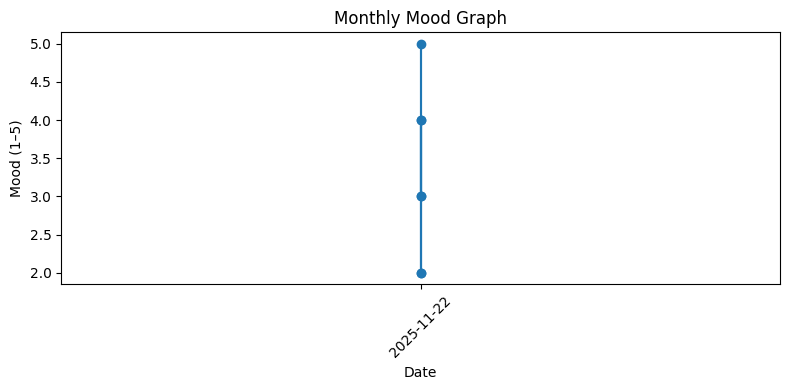


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Graph
7. Plot Monthly Graph
8. Exit
Choose an option: 6


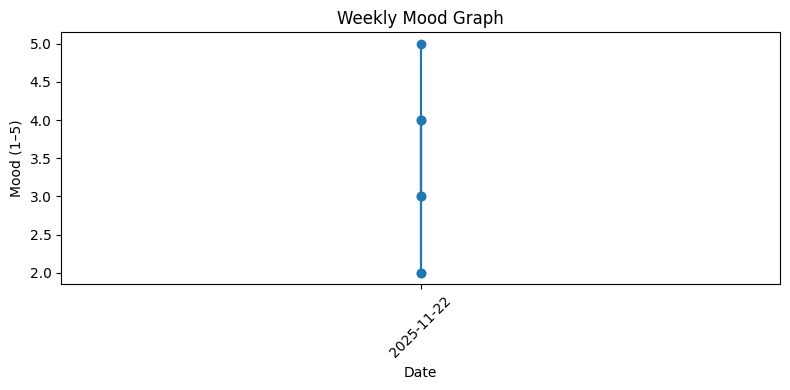


== Mood Tracker App ==
1. Add Mood
2. View All Moods
3. Weekly Summary
4. Monthly Summary
5. Analyze Mood Trend
6. Plot Weekly Graph
7. Plot Monthly Graph
8. Exit
Choose an option: 8
Goodbye


In [2]:
import json
import datetime
import matplotlib.pyplot as plt

DATA_FILE = "moods.json"

# storage functions

def save_mood(mood, note):
    entry = {
        "date": str(datetime.date.today()),
        "mood": mood,
        "note": note
    }

    try:
        with open(DATA_FILE, "r") as f:
            data = json.load(f)
    except:
        data = []

    data.append(entry)

    with open(DATA_FILE, "w") as f:
        json.dump(data, f, indent=4)

    print("\nMood saved successfully!\n")


def load_moods():
    try:
        with open(DATA_FILE, "r") as f:
            return json.load(f)
    except:
        return []

# analyzer functions

def analyze_weekly(moods):
    week = moods[-7:] if len(moods) >= 7 else moods
    return week


def analyze_monthly(moods):
    today = datetime.date.today()
    month_data = []
    for m in moods:
        d = datetime.date.fromisoformat(m["date"])
        if d.month == today.month and d.year == today.year:
            month_data.append(m)
    return month_data


def analyze_trend(moods):
    if len(moods) < 2:
        print("Not enough data for trend analysis.")
        return

    mood_values = [int(m["mood"]) for m in moods]

    if mood_values[-1] > mood_values[-2]:
        print("\nYour mood is improving! 😊")
    elif mood_values[-1] < mood_values[-2]:
        print("\nYour mood dropped recently. Stay strong ❤️")
    else:
        print("\nYour mood is stable 👍")

# visualisation functions

def plot_weekly(moods):
    weekly = analyze_weekly(moods)

    if not weekly:
        print("No data to plot.")
        return

    dates = [m["date"] for m in weekly]
    values = [int(m["mood"]) for m in weekly]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, values, marker="o")
    plt.title("Weekly Mood Graph")
    plt.xlabel("Date")
    plt.ylabel("Mood (1–5)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_monthly(moods):
    monthly = analyze_monthly(moods)

    if not monthly:
        print("No data to plot.")
        return

    dates = [m["date"] for m in monthly]
    values = [int(m["mood"]) for m in monthly]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, values, marker="o")
    plt.title("Monthly Mood Graph")
    plt.xlabel("Date")
    plt.ylabel("Mood (1–5)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# main app

def add_mood():
    print("\nRate your mood today (1 to 5):")
    mood = input("Mood: ")

    note = input("Any note/comments? (optional): ")

    save_mood(mood, note)


def view_all():
    moods = load_moods()
    if not moods:
        print("\nNo mood records found.\n")
        return

    print("\n-- Mood Records --\n")
    for m in moods:
        print(f"Date: {m['date']} | Mood: {m['mood']} | Note: {m['note']}")
    print()


def show_weekly_summary():
    moods = load_moods()
    weekly = analyze_weekly(moods)

    print("\n-- Weekly Summary --")
    for m in weekly:
        print(f"{m['date']} → Mood: {m['mood']}  Note: {m['note']}")
    print()


def show_monthly_summary():
    moods = load_moods()
    monthly = analyze_monthly(moods)

    print("\n-- Monthly Summary --")
    for m in monthly:
        print(f"{m['date']} → Mood: {m['mood']}  Note: {m['note']}")
    print()

    # menu loop

def main():
    while True:
        print("\n== Mood Tracker App ==")
        print("1. Add Mood")
        print("2. View All Moods")
        print("3. Weekly Summary")
        print("4. Monthly Summary")
        print("5. Analyze Mood Trend")
        print("6. Plot Weekly Graph")
        print("7. Plot Monthly Graph")
        print("8. Exit")

        choice = input("Choose an option: ")

        if choice == "1":
            add_mood()
        elif choice == "2":
            view_all()
        elif choice == "3":
            show_weekly_summary()
        elif choice == "4":
            show_monthly_summary()
        elif choice == "5":
            analyze_trend(load_moods())
        elif choice == "6":
            plot_weekly(load_moods())
        elif choice == "7":
            plot_monthly(load_moods())
        elif choice == "8":
            print("Goodbye")
            break
        else:
            print("Invalid option")

main()
